In [1]:
library(locfit)
library(RcppCNPy)
library(reticulate)
np <- import('numpy')

locfit 1.5-9.1 	 2013-03-22


In [2]:
p0 = c(1.14385, 13.28584, 0.34846, 11.30750, 11.97186, 0., 0.)

In [3]:
##ngal(1)+wp(19)+ggl(20)+vpf(20)+Pcic(40)

In [4]:
data_97 <- np$load('Run_061218/bolp_20p0_um_0_b_97.npz')
data_250 <- np$load('Run_061218/bolp_20p0_um_0_b_250.npz')
data_455 <- np$load('Run_061218/bolp_20p0_um_0_b_455.npz')
data_904 <- np$load('Run_061218/bolp_20p0_um_0_b_904.npz')
data_63 <- np$load('Run_061218/bolp_20p0_um_0_b_63.npz')

In [5]:
find_dfdp <- function(data, num, kern, plot=0){
    setwd(sprintf('~/Assembly Bias Project/Fisher analysis/Run_061218/bolp20p0_um_0_locfit_%s',kern))
    dfdp = matrix(0,nrow=7,ncol=100)
    for (i in seq(7)){
        x <- data$f[['param']][(200*i-199):(200*i),i]
        p <- p0[i]
        for (j in seq(100)){
            y <- data$f[['func_all']][(200*i-199):(200*i),j]
            fit <- locfit(y~x,deriv=1,kern=kern)
            fit_orig <- locfit(y~x,kern=kern)
            f <- as.numeric(preplot(fit_orig,p)[2])
            fp <- as.numeric(preplot(fit,p)[2])
            dfdp[i,j] <- fp
            if (plot==1){
                png(filename=sprintf('run%i_p%if%i.png',num,(i-1),(j-1)))
                plot(x, y)
                lines(fit_orig,col='blue')
                abline(v=p,lty=2)
                abline(a=-p*fp+f,b=fp,col='red')
                dev.off()
            }
        }
    }
    dfdp
}

In [6]:
dfdp_97_tcub = find_dfdp(data_97,97,kern='tcub',plot=0)
dfdp_250_tcub = find_dfdp(data_250,250,kern='tcub',plot=0)
dfdp_455_tcub = find_dfdp(data_455,455,kern='tcub',plot=0)
dfdp_904_tcub = find_dfdp(data_904,904,kern='tcub',plot=0)
dfdp_63_tcub = find_dfdp(data_63,63,kern='tcub',plot=0)

In [ ]:
dfdp_97_rect = find_dfdp(data_97,97,kern='rect',plot=0)
dfdp_250_rect = find_dfdp(data_250,250,kern='rect',plot=0)
dfdp_455_rect = find_dfdp(data_455,455,kern='rect',plot=0)
dfdp_904_rect = find_dfdp(data_904,904,kern='rect',plot=0)
dfdp_63_rect = find_dfdp(data_63,63,kern='rect',plot=0)

In [ ]:
dfdp_97_trwt = find_dfdp(data_97,97,kern='trwt',plot=0)
dfdp_250_trwt = find_dfdp(data_250,250,kern='trwt',plot=0)
dfdp_455_trwt = find_dfdp(data_455,455,kern='trwt',plot=0)
dfdp_904_trwt = find_dfdp(data_904,904,kern='trwt',plot=0)
dfdp_63_trwt = find_dfdp(data_63,63,kern='trwt',plot=0)

In [ ]:
dfdp_97_tria = find_dfdp(data_97,97,kern='tria',plot=0)
dfdp_250_tria = find_dfdp(data_250,250,kern='tria',plot=0)
dfdp_455_tria = find_dfdp(data_455,455,kern='tria',plot=0)
dfdp_904_tria = find_dfdp(data_904,904,kern='tria',plot=0)
dfdp_63_tria = find_dfdp(data_63,63,kern='tria',plot=0)

In [ ]:
dfdp_97_epan = find_dfdp(data_97,97,kern='epan',plot=0)
dfdp_250_epan = find_dfdp(data_250,250,kern='epan',plot=0)
dfdp_455_epan = find_dfdp(data_455,455,kern='epan',plot=0)
dfdp_904_epan = find_dfdp(data_904,904,kern='epan',plot=0)
dfdp_63_epan = find_dfdp(data_63,63,kern='epan',plot=0)

In [ ]:
dfdp_97_bisq = find_dfdp(data_97,97,kern='bisq',plot=0)
dfdp_250_bisq = find_dfdp(data_250,250,kern='bisq',plot=0)
dfdp_455_bisq = find_dfdp(data_455,455,kern='bisq',plot=0)
dfdp_904_bisq = find_dfdp(data_904,904,kern='bisq',plot=0)
dfdp_63_bisq = find_dfdp(data_63,63,kern='bisq',plot=0)

In [ ]:
dfdp_97_gauss = find_dfdp(data_97,97,kern='gauss',plot=0)
dfdp_250_gauss = find_dfdp(data_250,250,kern='gauss',plot=0)
dfdp_455_gauss = find_dfdp(data_455,455,kern='gauss',plot=0)
dfdp_904_gauss = find_dfdp(data_904,904,kern='gauss',plot=0)
dfdp_63_gauss = find_dfdp(data_63,63,kern='gauss',plot=0)

In [20]:
setwd('~/Assembly Bias Project/Fisher analysis/Run_061218/')

In [21]:
np$savez('dfdp_bolp20p0_um_0_tcub.npz',dfdp_97=dfdp_97_tcub,dfdp_250=dfdp_250_tcub,dfdp_455=dfdp_455_tcub,
         dfdp_904=dfdp_904_tcub,dfdp_63=dfdp_63_tcub)
np$savez('dfdp_bolp20p0_um_0_rect.npz',dfdp_97=dfdp_97_rect,dfdp_250=dfdp_250_rect,dfdp_455=dfdp_455_rect,
         dfdp_904=dfdp_904_rect,dfdp_63=dfdp_63_rect)
np$savez('dfdp_bolp20p0_um_0_trwt.npz',dfdp_97=dfdp_97_trwt,dfdp_250=dfdp_250_trwt,dfdp_455=dfdp_455_trwt,
         dfdp_904=dfdp_904_trwt,dfdp_63=dfdp_63_trwt)
np$savez('dfdp_bolp20p0_um_0_tria.npz',dfdp_97=dfdp_97_tria,dfdp_250=dfdp_250_tria,dfdp_455=dfdp_455_tria,
         dfdp_904=dfdp_904_tria,dfdp_63=dfdp_63_tria)
np$savez('dfdp_bolp20p0_um_0_epan.npz',dfdp_97=dfdp_97_epan,dfdp_250=dfdp_250_epan,dfdp_455=dfdp_455_epan,
         dfdp_904=dfdp_904_epan,dfdp_63=dfdp_63_epan)
np$savez('dfdp_bolp20p0_um_0_bisq.npz',dfdp_97=dfdp_97_bisq,dfdp_250=dfdp_250_bisq,dfdp_455=dfdp_455_bisq,
         dfdp_904=dfdp_904_bisq,dfdp_63=dfdp_63_bisq)
np$savez('dfdp_bolp20p0_um_0_gauss.npz',dfdp_97=dfdp_97_gauss,dfdp_250=dfdp_250_gauss,dfdp_455=dfdp_455_gauss,
         dfdp_904=dfdp_904_gauss,dfdp_63=dfdp_63_gauss)

In [8]:
data_fid <- np$load('../bolp_20p0_0.npz')

In [9]:
data_fid$files

[1] "func_all"     "param"        "func_all_cov"

In [10]:
cov_tot <- (cov(data_fid$f[['func_all']])+colMeans(data_fid$f[['func_all_cov']],dims=1))

In [11]:
cov_tot

2.094186e-08,8.054374e-05,2.425617e-04,3.042403e-04,3.407521e-04,2.909748e-04,2.692553e-04,1.915049e-04,0.0001194458,6.273969e-05,⋯,1.753261e-08,1.598199e-08,1.452841e-08,1.347941e-08,1.248933e-08,1.151038e-08,1.129977e-08,1.048359e-08,9.340719e-09,1.003631e-07
8.054374e-05,3.984999e+02,2.307566e+02,1.952640e+02,1.698144e+02,1.335883e+02,1.085157e+02,8.076387e+01,59.7094609748,4.397496e+01,⋯,1.643372e-03,1.411434e-03,1.230247e-03,1.351061e-03,1.368307e-03,1.166616e-03,1.107459e-03,1.150946e-03,1.066858e-03,1.525192e-02
2.425617e-04,2.307566e+02,2.798185e+02,1.921281e+02,1.636964e+02,1.300324e+02,1.064929e+02,8.165229e+01,58.8017762969,4.341030e+01,⋯,1.622131e-03,1.343668e-03,1.401028e-03,1.340622e-03,1.323887e-03,1.084602e-03,1.128580e-03,1.181254e-03,1.030763e-03,1.554507e-02
3.042403e-04,1.952640e+02,1.921281e+02,1.952796e+02,1.478543e+02,1.162338e+02,9.539530e+01,7.439334e+01,53.7204613987,3.963870e+01,⋯,1.518677e-03,1.289900e-03,1.258744e-03,1.319524e-03,1.136040e-03,1.097766e-03,1.121256e-03,1.123621e-03,1.051466e-03,1.408232e-02
3.407521e-04,1.698144e+02,1.636964e+02,1.478543e+02,1.471845e+02,1.076718e+02,8.918098e+01,6.867834e+01,49.8341211951,3.724072e+01,⋯,1.286155e-03,1.178255e-03,1.123042e-03,1.077919e-03,1.053586e-03,9.582036e-04,9.346416e-04,9.643649e-04,9.120713e-04,1.298061e-02
2.909748e-04,1.335883e+02,1.300324e+02,1.162338e+02,1.076718e+02,9.497288e+01,7.468218e+01,5.839313e+01,42.8675164196,3.197261e+01,⋯,1.046492e-03,9.624541e-04,9.351838e-04,9.124881e-04,9.107046e-04,8.235563e-04,8.148510e-04,8.347885e-04,8.028971e-04,1.108065e-02
2.692553e-04,1.085157e+02,1.064929e+02,9.539530e+01,8.918098e+01,7.468218e+01,6.726854e+01,5.124751e+01,37.8441170420,2.840175e+01,⋯,8.772307e-04,8.206896e-04,8.161501e-04,7.781784e-04,7.762073e-04,7.271639e-04,7.077437e-04,7.315960e-04,6.570250e-04,9.326322e-03
1.915049e-04,8.076387e+01,8.165229e+01,7.439334e+01,6.867834e+01,5.839313e+01,5.124751e+01,4.399169e+01,32.5285159523,2.478179e+01,⋯,6.367784e-04,5.734829e-04,5.792854e-04,5.568761e-04,5.559642e-04,5.259758e-04,5.113871e-04,5.512032e-04,5.092103e-04,7.608780e-03
1.194458e-04,5.970946e+01,5.880178e+01,5.372046e+01,4.983412e+01,4.286752e+01,3.784412e+01,3.252852e+01,26.7226262560,2.045565e+01,⋯,4.131927e-04,4.027573e-04,3.916065e-04,3.645393e-04,3.784910e-04,3.664239e-04,3.681941e-04,3.806782e-04,3.681508e-04,5.617174e-03
6.273969e-05,4.397496e+01,4.341030e+01,3.963870e+01,3.724072e+01,3.197261e+01,2.840175e+01,2.478179e+01,20.4556513034,1.726842e+01,⋯,2.476442e-04,2.401850e-04,2.255588e-04,2.176964e-04,2.354050e-04,2.113524e-04,2.130347e-04,2.281668e-04,2.224019e-04,3.831436e-03
4.009914e-05,2.929358e+01,2.916159e+01,2.683663e+01,2.504164e+01,2.151649e+01,1.917335e+01,1.696404e+01,14.0328748478,1.180747e+01,⋯,1.937272e-04,1.810281e-04,1.746550e-04,1.621895e-04,1.719948e-04,1.576895e-04,1.567250e-04,1.645988e-04,1.529122e-04,2.678448e-03


In [12]:
calc_fisher <- function(dfdp, covtot){
    fmatrix = matrix(0,nrow=7,ncol=7)
    for (i in seq(7)){
        for (j in seq(7)){
            fmatrix[i,j] = ((dfdp[i,] %*% solve(covtot)) %*% dfdp[j,])
        }
    }
    fmatrix
}

In [13]:
calc_1sigma <- function(fisher){
    one_sigma = array(0,7)
    for (i in seq(7)){
        one_sigma[i] <- sqrt(solve(fisher)[i,i])
    }
    one_sigma
}

In [14]:
fisher_97 <- calc_fisher(dfdp_97,cov_tot)
fisher_250 <- calc_fisher(dfdp_250,cov_tot)
fisher_455 <- calc_fisher(dfdp_455,cov_tot)
fisher_904 <- calc_fisher(dfdp_904,cov_tot)
fisher_63 <- calc_fisher(dfdp_63,cov_tot)

In [15]:
one_sigma_97 <- calc_1sigma(fisher_97)
one_sigma_250 <- calc_1sigma(fisher_250)
one_sigma_455 <- calc_1sigma(fisher_455)
one_sigma_904 <- calc_1sigma(fisher_904)
one_sigma_63 <- calc_1sigma(fisher_63)

In [16]:
dfdp_mean <- apply(simplify2array(list(dfdp_97,dfdp_250,dfdp_455,dfdp_904,dfdp_63)),c(1,2),mean)
fisher_mean_dfdp <- calc_fisher(dfdp_mean,cov_tot)
one_sigma_mean_dfdp <- calc_1sigma(fisher_mean_dfdp)

In [17]:
mean_fisher <- apply(simplify2array(list(fisher_97,fisher_250,fisher_455,fisher_904,fisher_63)),c(1,2),mean)

### alpha logM1 sigmalogM logM0 logMmin Acen Asat

In [18]:
one_sigma_97
one_sigma_250
one_sigma_455
one_sigma_904
one_sigma_63

[1] 0.01867780 0.01543632 0.02690230 0.34510056 0.01192424 0.12587932 0.14170001

[1] 0.01566797 0.01266566 0.02779033 0.28857303 0.01272442 0.10551470 0.13568635

[1] 0.01630039 0.01254189 0.02647714 0.27087822 0.01282437 0.10964290 0.14678283

[1] 0.01437935 0.01225055 0.02654457 0.22328008 0.01226456 0.11225034 0.14166879

[1] 0.01811974 0.01547768 0.02721068 0.35964694 0.01352242 0.11685498 0.14217018

In [19]:
###mean on sigma level
mean_one_sigma <- colMeans(rbind(one_sigma_97,one_sigma_250,one_sigma_455,one_sigma_904,one_sigma_63),dims=1)
mean_one_sigma

[1] 0.01662905 0.01367442 0.02698501 0.29749577 0.01265200 0.11402845 0.14160163

In [20]:
###mean on dfdp level
one_sigma_mean_dfdp

[1] 0.02258384 0.02036652 0.03660005 0.53719296 0.01775098 0.17478233 0.17023441

In [21]:
###mean on fisher matrix level
one_sigma_mean_fisher <- calc_1sigma(mean_fisher)
one_sigma_mean_fisher

[1] 0.01600189 0.01309513 0.02665666 0.27645411 0.01246527 0.11167471 0.13993117

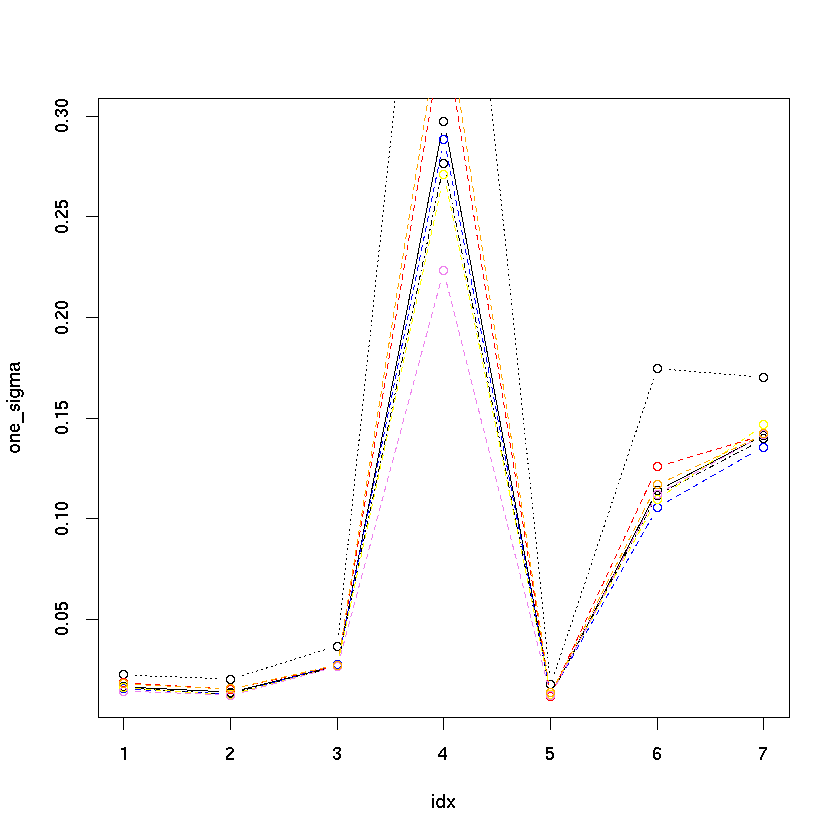

In [22]:
plot(mean_one_sigma, type='b', col='black',xlab='idx',ylab='one_sigma')
lines(one_sigma_mean_dfdp, col='black', type='b',lty=3)
lines(one_sigma_mean_fisher, col='black', type='b',lty=4)
lines(one_sigma_97, col='red', type='b',lty=2)
lines(one_sigma_250, col='blue', type='b',lty=2)
lines(one_sigma_455, col='yellow', type='b',lty=2)
lines(one_sigma_904, col='violet', type='b',lty=2)
lines(one_sigma_63, col='orange', type='b',lty=2)

## wp only

In [23]:
fisher_97_wp <- calc_fisher(dfdp_97[,1:20],cov_tot[1:20,1:20])
fisher_250_wp <- calc_fisher(dfdp_250[,1:20],cov_tot[1:20,1:20])
fisher_455_wp <- calc_fisher(dfdp_455[,1:20],cov_tot[1:20,1:20])
fisher_904_wp <- calc_fisher(dfdp_904[,1:20],cov_tot[1:20,1:20])
fisher_63_wp <- calc_fisher(dfdp_63[,1:20],cov_tot[1:20,1:20])

In [24]:
one_sigma_97_wp <- calc_1sigma(fisher_97_wp)
one_sigma_250_wp <- calc_1sigma(fisher_250_wp)
one_sigma_455_wp <- calc_1sigma(fisher_455_wp)
one_sigma_904_wp <- calc_1sigma(fisher_904_wp)
one_sigma_63_wp <- calc_1sigma(fisher_63_wp)

In [25]:
one_sigma_97_wp
one_sigma_250_wp
one_sigma_455_wp
one_sigma_904_wp
one_sigma_63_wp

[1] 0.04344168 0.03436855 0.23401344 0.86994874 0.09410195 0.83843511 0.34684693

[1] 0.03154343 0.02669017 0.19686508 0.71322634 0.07453637 0.43098428 0.45841147

[1] 0.03431946 0.03257818 0.18678289 0.70293060 0.06763171 0.58651253 0.37477093

[1] 0.04366725 0.06768833 0.16298282 1.26372845 0.06040974 0.51669500 0.62278929

[1] 0.03915497 0.03074806 0.20045401 0.91959773 0.07623709 0.62701222 0.29779742

In [90]:
library(colorspace)

In [98]:
library("lattice")

In [100]:
plot_dfdp_discrepancy <- function(dfdp,meandfdp){
    a <- dfdp/meandfdp - 1  
    dim(a) <- 700
    data <- expand.grid(X=seq(7), Y=seq(100))
    data$Z <- a
    levelplot(Z ~ X*Y, data=data, xlab='p_i', ylab='f_i',cuts=20, subset= a > -10 & a < 10,
          col.regions = rainbow_hcl(100)[length(rainbow_hcl(100)):1])
 
    
}

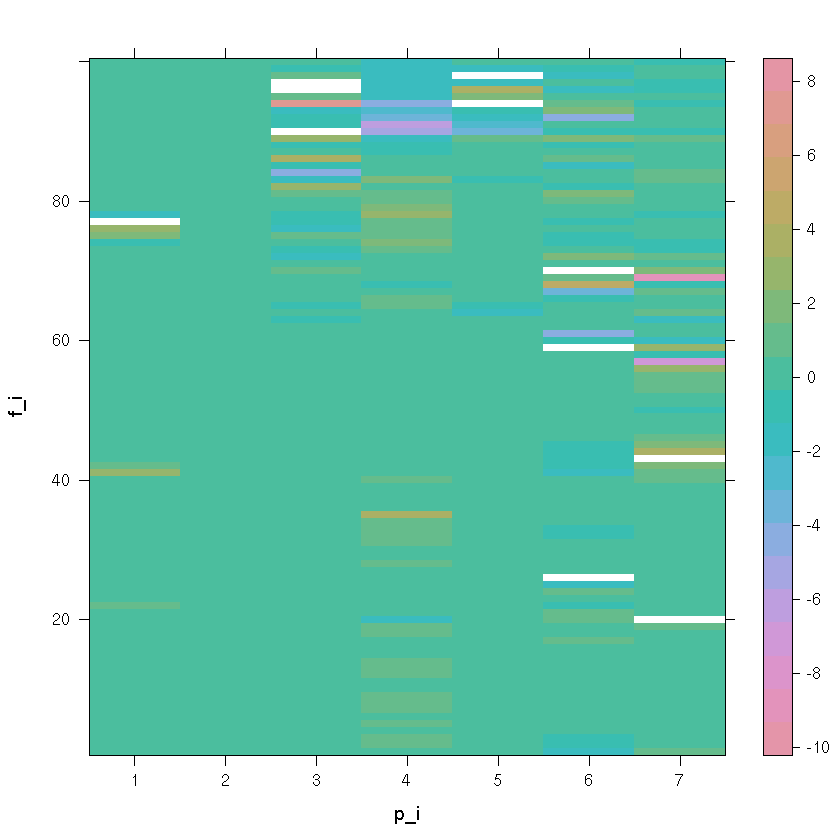

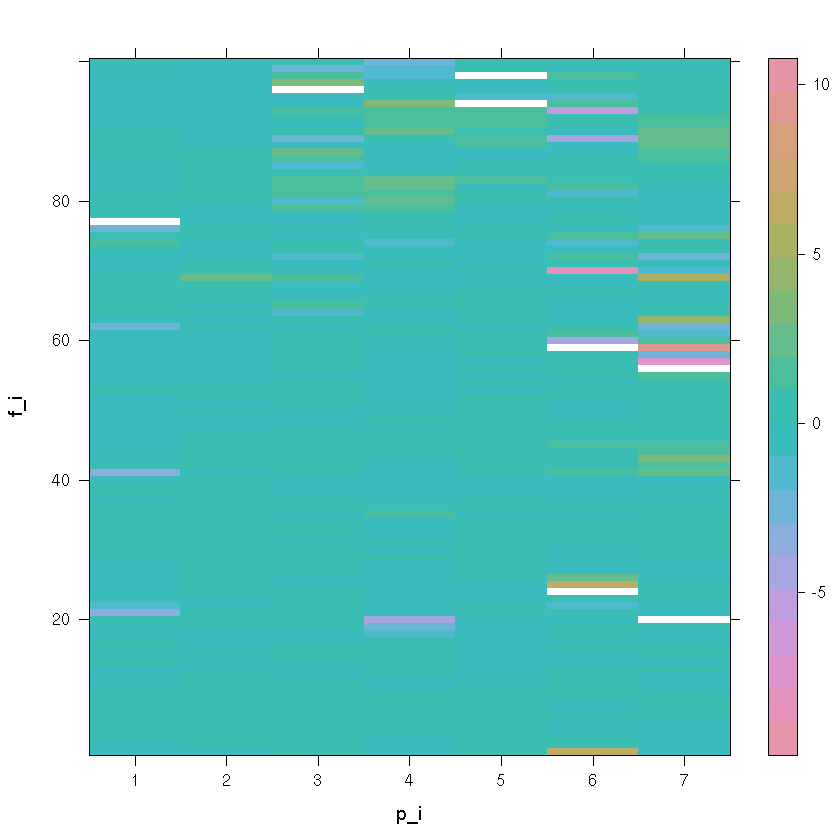

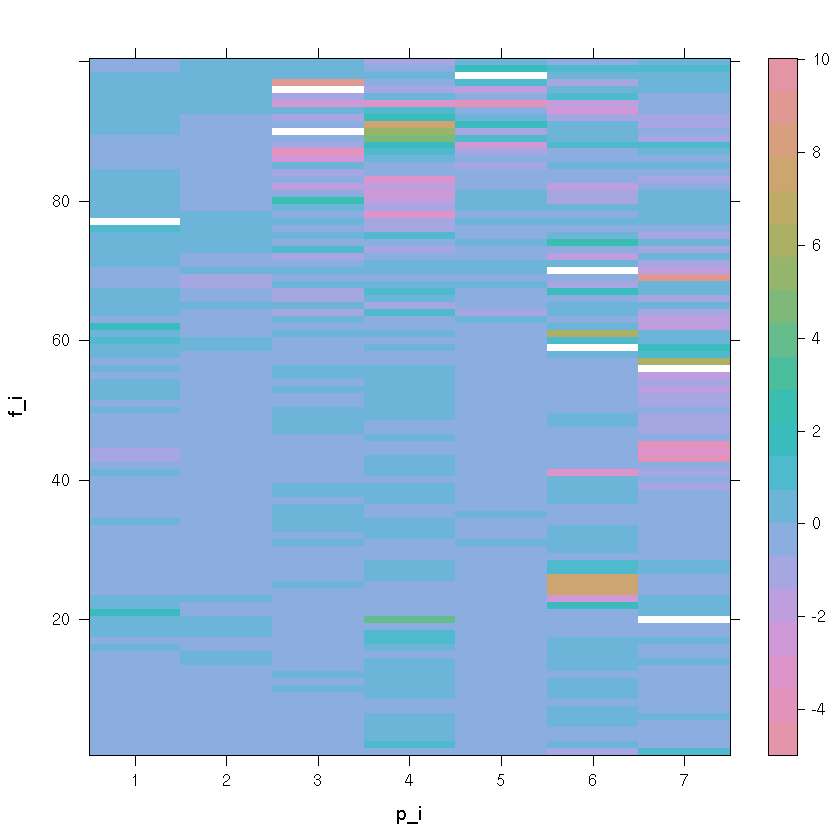

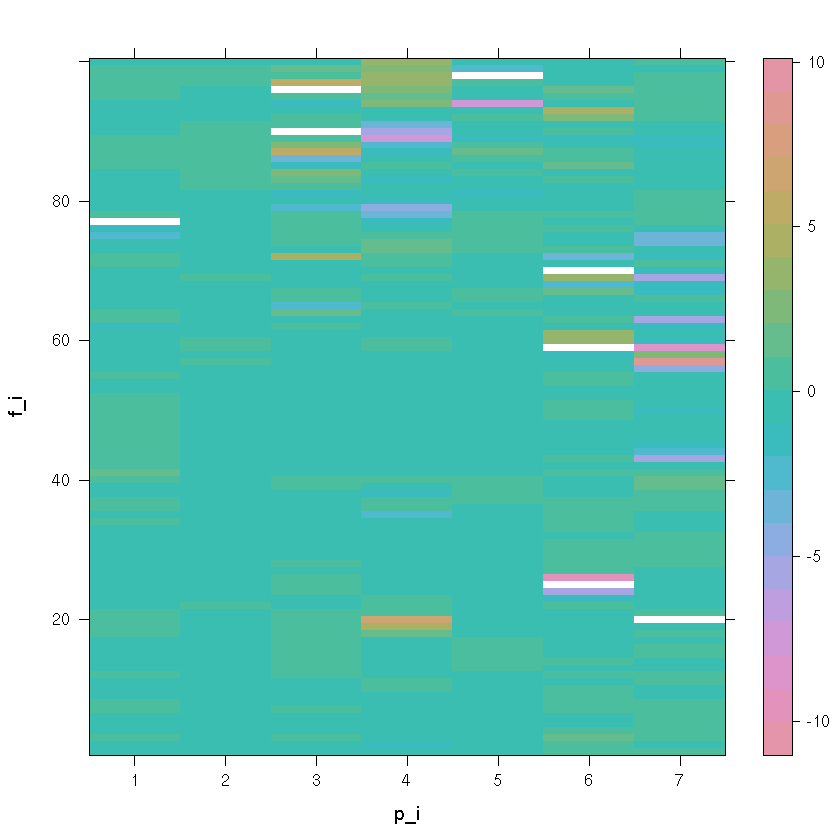

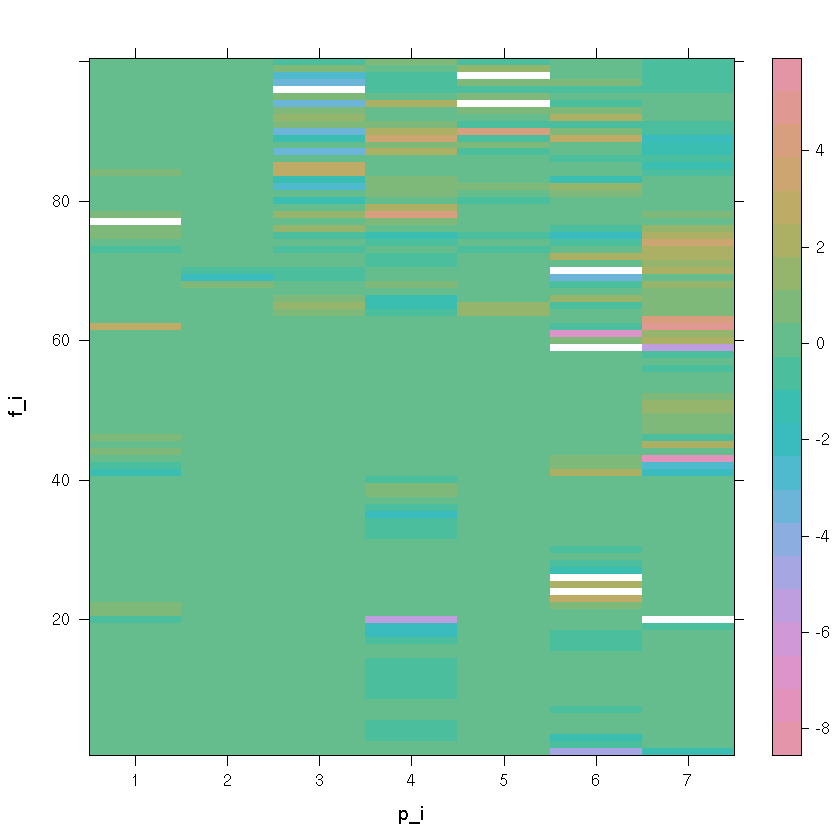

In [102]:
plot_dfdp_discrepancy(dfdp_97,dfdp_mean)
plot_dfdp_discrepancy(dfdp_250,dfdp_mean)
plot_dfdp_discrepancy(dfdp_455,dfdp_mean)
plot_dfdp_discrepancy(dfdp_904,dfdp_mean)
plot_dfdp_discrepancy(dfdp_63,dfdp_mean)

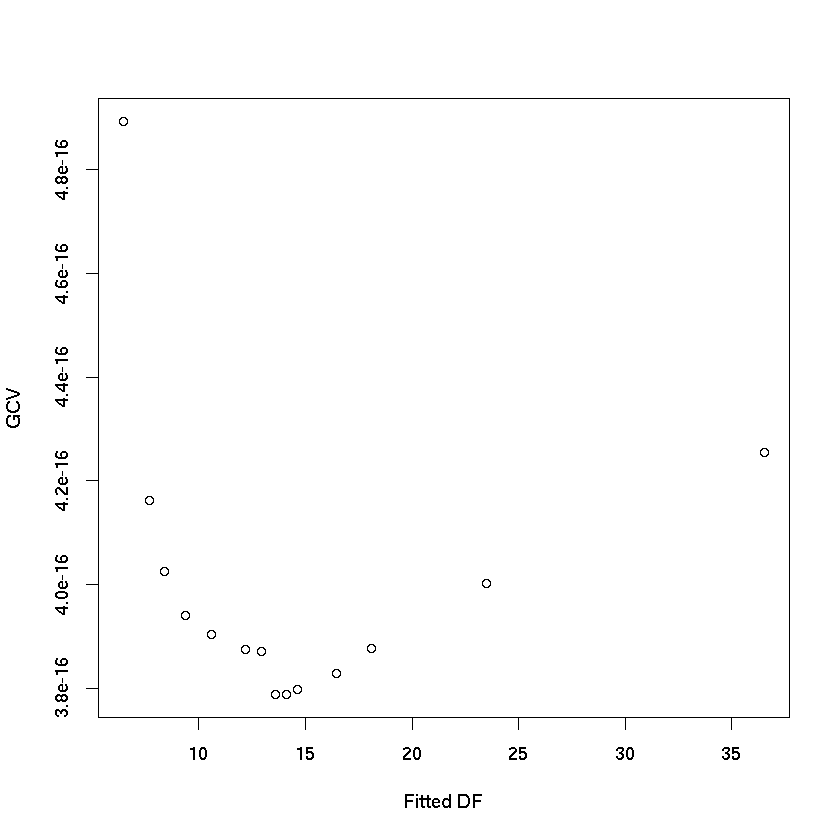

In [28]:
y <- data_63$f[['func_all']][1:200,1]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

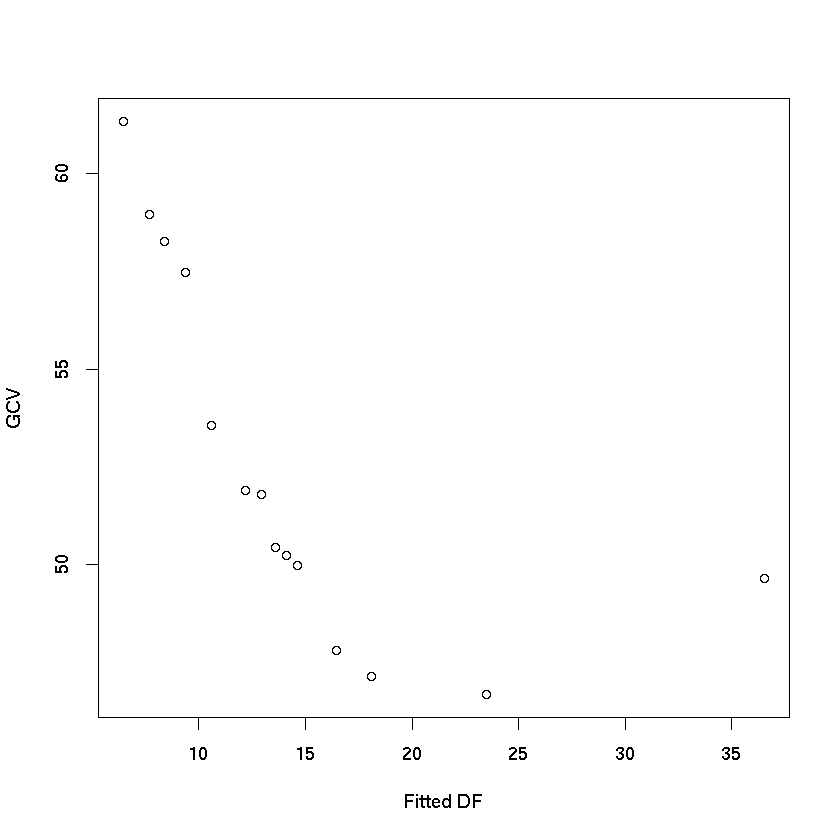

In [30]:
y <- data_63$f[['func_all']][1:200,2]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

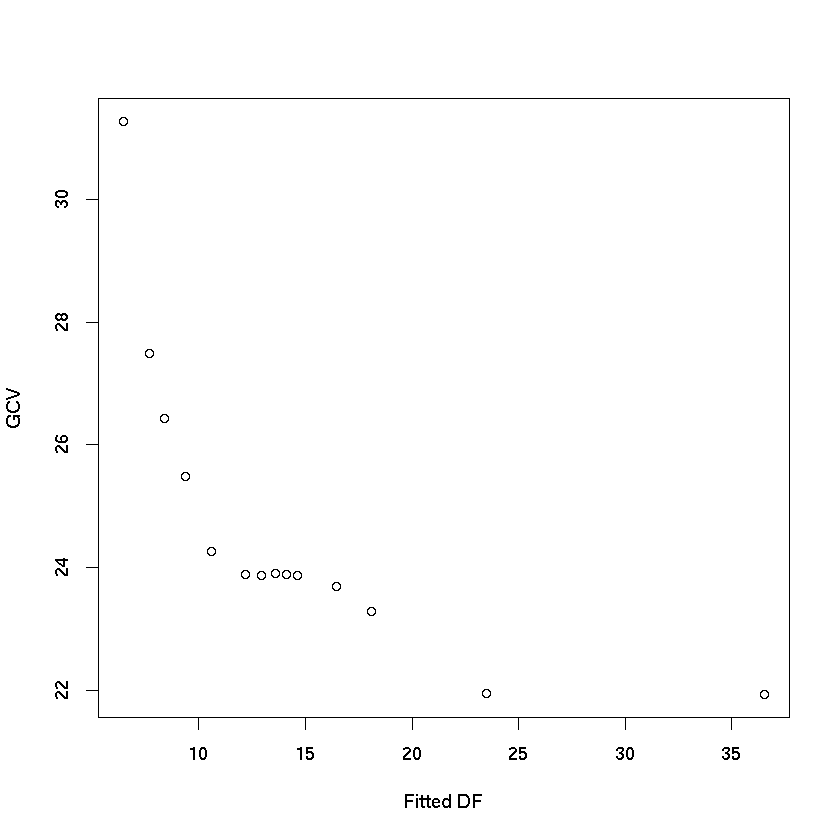

In [32]:
y <- data_63$f[['func_all']][1:200,3]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

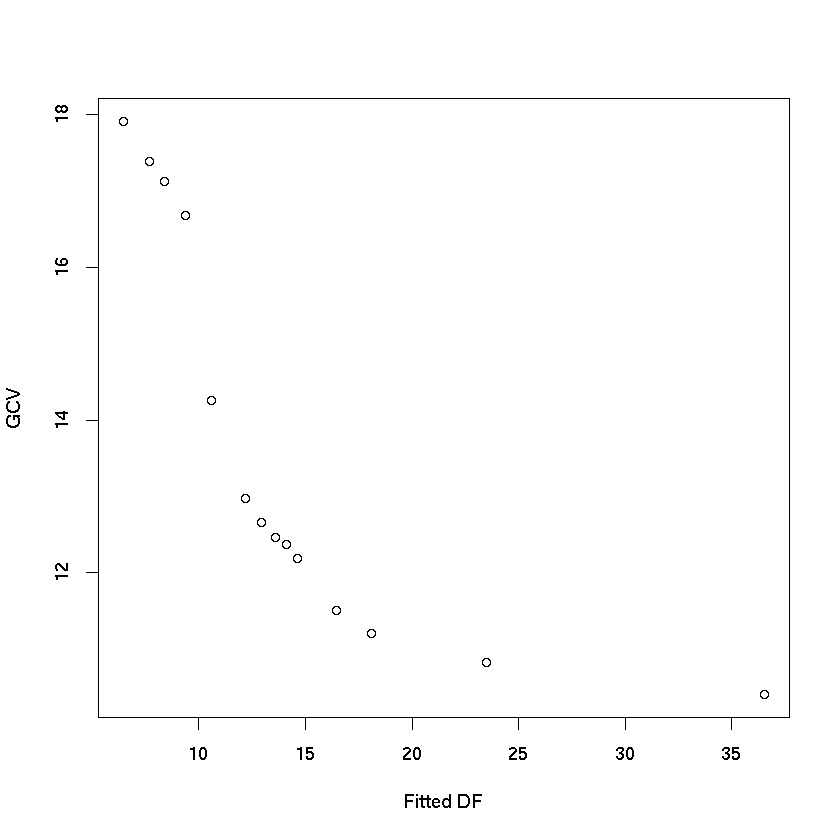

In [33]:
y <- data_63$f[['func_all']][1:200,4]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

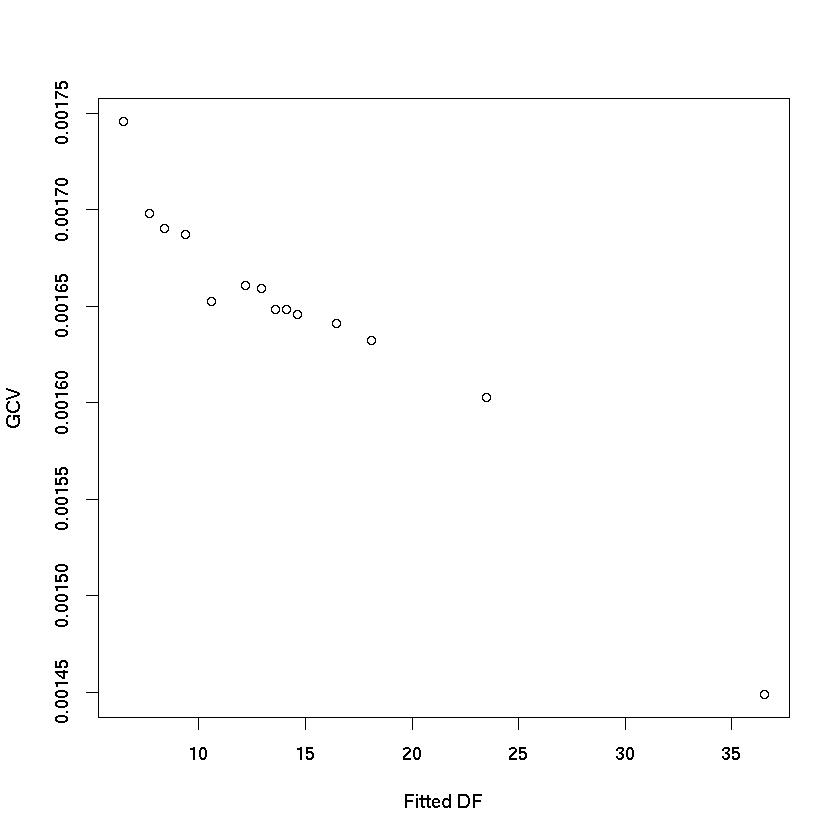

In [34]:
y <- data_63$f[['func_all']][1:200,20]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

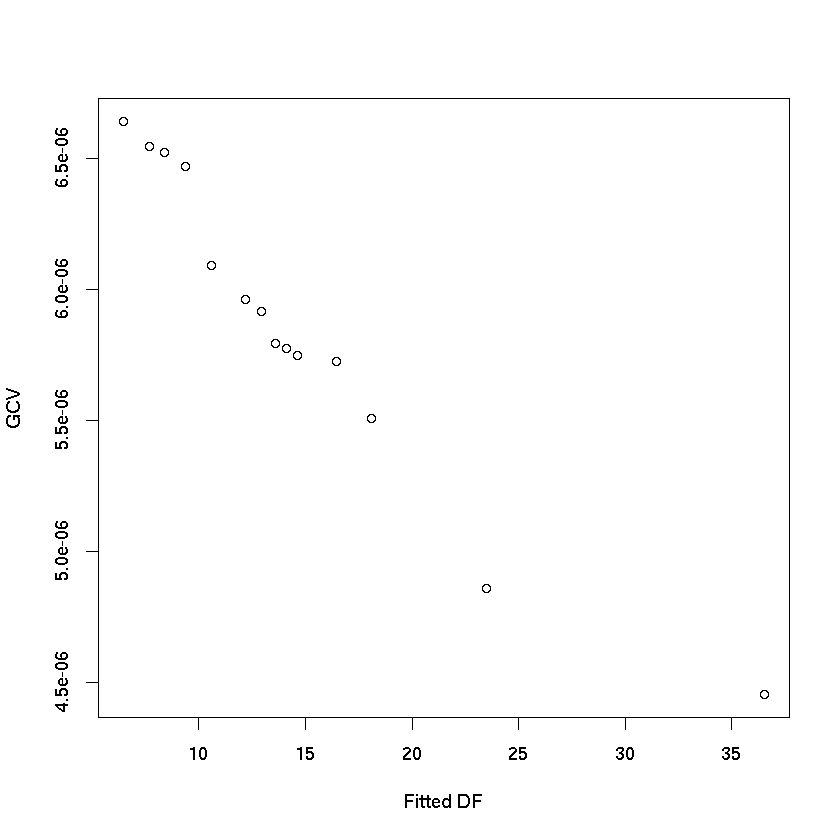

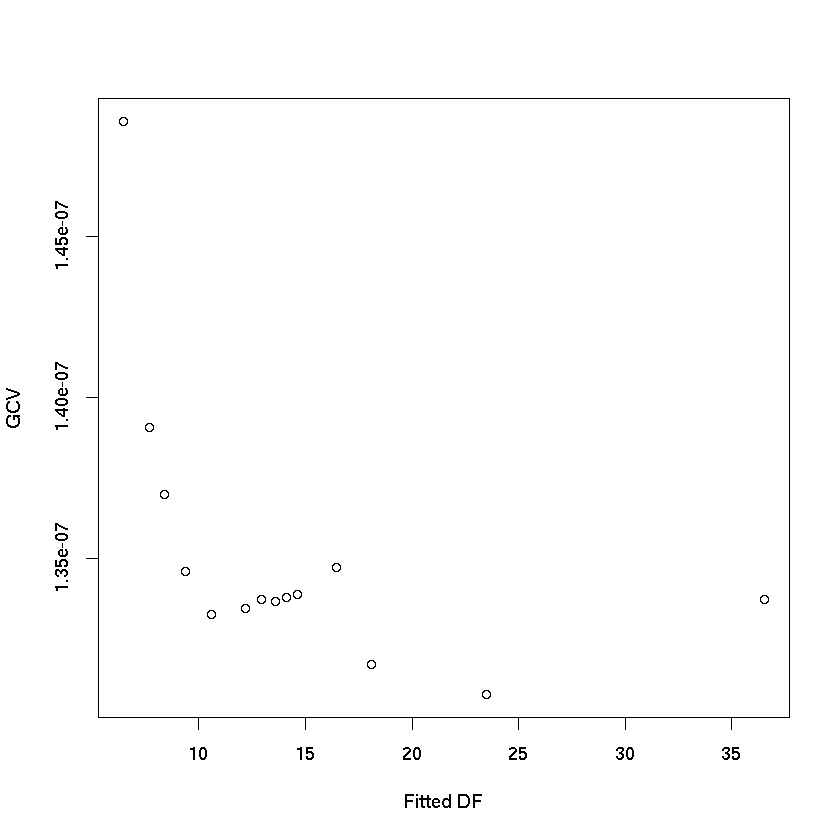

In [37]:
y <- data_63$f[['func_all']][1:200,40]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))
y <- data_63$f[['func_all']][1:200,50]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

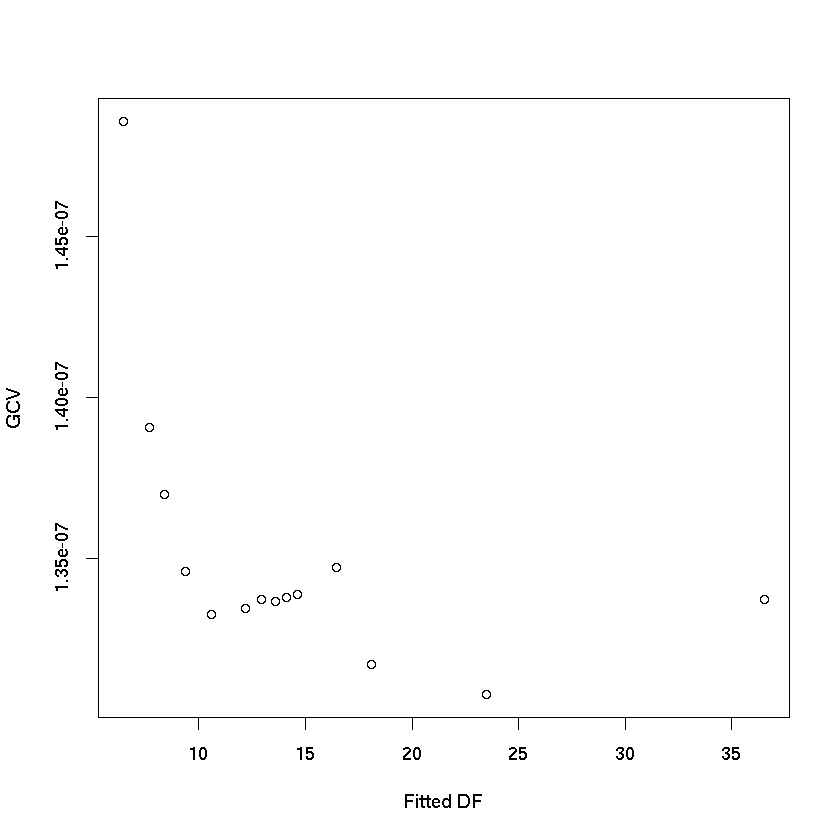

In [36]:
y <- data_63$f[['func_all']][1:200,50]
x <- data_63$f[['param']][1:200,1]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

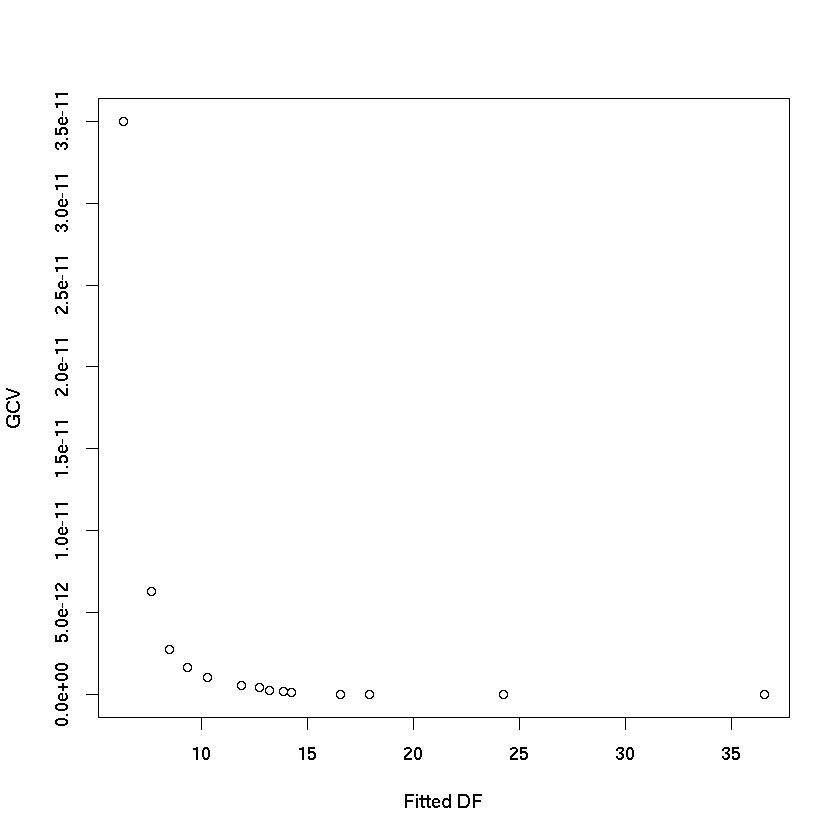

In [29]:
y <- data_63$f[['func_all']][201:400,1]
x <- data_63$f[['param']][201:400,2]

gcvplot(y~x,kern='tria',alpha=c(0.1,0.15,0.2,0.22,0.25,0.26,0.27,0.28,0.3,0.35,0.4,0.45,0.5,0.6))

In [42]:
y <- data_63$f[['func_all']][1:200,1]
x <- data_63$f[['param']][1:200,1]

In [50]:
as.numeric(gcv(y~x,kern='tria',alpha=0.1))[4]

[1] 4.255631e-16

In [44]:
gcv(y~x,kern='tria',alpha=0.3)

lik          infl          vari           gcv 
-3.416861e-14  1.220959e+01  9.833345e+00  3.875614e-16

In [45]:
gcv(y~x,kern='tria',alpha=0.9)

lik          infl          vari           gcv 
-1.086109e-13  4.369687e+00  3.667605e+00  1.135171e-15